# Домашнее задание AZ03 — Визуализация данных

Этот ноутбук содержит решение трёх заданий:

1. **Гистограмма нормального распределения** — `numpy.random.normal`
2. **Диаграмма рассеяния** — `numpy.random.rand`
3. **Анализ цен на диваны** — обработка данных с divan.ru и гистограмма цен

> 💡 **Совет:** запускай ячейки по порядку сверху вниз.  
> Для задания 3 сначала запусти парсер: `python scripts/parse_divan.py`

In [2]:
# Общие импорты для всех заданий
import numpy as np
import matplotlib.pyplot as plt

# Настройка отображения графиков в ноутбуке
%matplotlib inline

# Фиксируем seed для воспроизводимости результатов
np.random.seed(42)

# Настройка стиля графиков
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

print("✅ Импорты загружены, seed зафиксирован")

✅ Импорты загружены, seed зафиксирован


---

## Задание 1. Гистограмма нормального распределения

**Задача:** создать гистограмму для случайных данных, сгенерированных с помощью функции `numpy.random.normal`.

**Параметры распределения:**
- `mean = 0` — среднее значение
- `std_dev = 1` — стандартное отклонение  
- `num_samples = 1000` — количество образцов

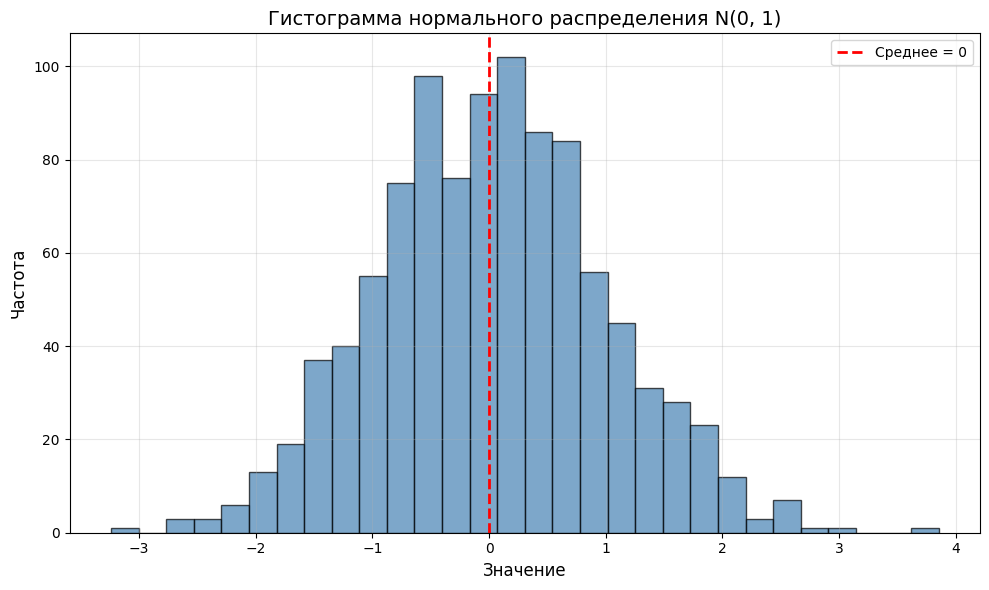


📊 Статистика выборки:
   Размер выборки: 1000
   Среднее: 0.0193
   Стд. отклонение: 0.9787


In [3]:
# Задание 1: Гистограмма нормального распределения

# Параметры нормального распределения
mean = 0            # Среднее значение (μ)
std_dev = 1         # Стандартное отклонение (σ)
num_samples = 1000  # Количество образцов

# Генерация случайных чисел по нормальному распределению N(0, 1)
data = np.random.normal(mean, std_dev, num_samples)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')

# Оформление графика
plt.title(f'Гистограмма нормального распределения N({mean}, {std_dev})', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавим вертикальную линию на среднем значении
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Среднее = {mean}')
plt.legend()

plt.tight_layout()
plt.show()

# Статистика по сгенерированным данным
print(f"\n📊 Статистика выборки:")
print(f"   Размер выборки: {len(data)}")
print(f"   Среднее: {data.mean():.4f}")
print(f"   Стд. отклонение: {data.std():.4f}")

---

## Задание 2. Диаграмма рассеяния случайных данных

**Задача:** построить диаграмму рассеяния для двух наборов случайных данных, сгенерированных с помощью функции `numpy.random.rand`.

Также нужно создать массив из 5 случайных чисел и вывести его:
```python
random_array = np.random.rand(5)
print(random_array)
```

Случайный массив из 5 чисел:
[0.61949035 0.46349404 0.37978578 0.86333365 0.51908179]


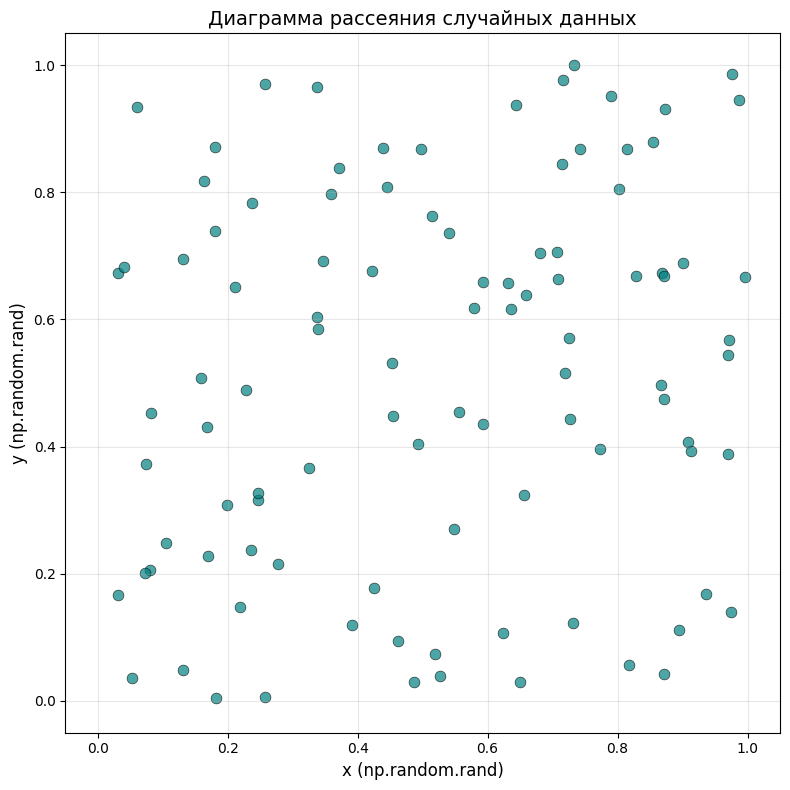


📊 Количество точек на графике: 100


In [4]:
# Задание 2: Диаграмма рассеяния случайных данных

# Количество точек для scatter-графика
num_points = 100

# Генерируем два набора случайных чисел от 0 до 1
x = np.random.rand(num_points)
y = np.random.rand(num_points)

# Пример отдельного массива из 5 случайных чисел (по заданию)
random_array = np.random.rand(5)
print("Случайный массив из 5 чисел:")
print(random_array)

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.7, c='teal', edgecolors='black', linewidth=0.5, s=60)

# Оформление графика
plt.title('Диаграмма рассеяния случайных данных', fontsize=14)
plt.xlabel('x (np.random.rand)', fontsize=12)
plt.ylabel('y (np.random.rand)', fontsize=12)
plt.grid(True, alpha=0.3)

# Устанавливаем одинаковый масштаб осей
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print(f"\n📊 Количество точек на графике: {num_points}")

---

## Задание 3. Парсинг цен на диваны с divan.ru

**Задача:**
1. Спарсить цены на диваны с сайта divan.ru в CSV-файл
2. Обработать данные (очистить строки, привести к числам)
3. Найти и вывести среднюю цену
4. Построить гистограмму цен

---

### ⚠️ Важно!

Перед запуском ячеек ниже нужно запустить парсер в терминале:

```bash
python scripts/parse_divan.py
```

Парсер создаст файл `data/divan_prices_raw.csv` с сырыми данными.

In [5]:
# Импорты для задания 3
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Пути к файлам данных
DATA_DIR = Path("../data")
RAW_CSV = DATA_DIR / "divan_prices_raw.csv"
CLEAN_CSV = DATA_DIR / "divan_prices_clean.csv"

print(f"📁 Директория данных: {DATA_DIR.resolve()}")
print(f"📄 Файл сырых данных: {RAW_CSV.name}")
print(f"📄 Файл очищенных данных: {CLEAN_CSV.name}")

📁 Директория данных: C:\Users\ergon\CursorProjects\az03-data-parsing-and-visualization\data
📄 Файл сырых данных: divan_prices_raw.csv
📄 Файл очищенных данных: divan_prices_clean.csv


In [6]:
# Шаг 1: Загрузка сырых данных

if not RAW_CSV.exists():
    print("❌ Файл с данными не найден!")
    print("   Сначала запусти парсер в терминале:")
    print("   python scripts/parse_divan.py")
else:
    raw_df = pd.read_csv(RAW_CSV)
    print(f"✅ Загружено записей: {len(raw_df)}")
    print(f"\nПервые 10 строк:")
    display(raw_df.head(10))

✅ Загружено записей: 126

Первые 10 строк:


,price_raw
0,28 990 руб.
1,41 990 руб.
2,56 990 руб.
3,71 990 руб.
4,84 990 руб.
5,113 990 руб.
6,59 990 руб.
7,79 990 руб.
8,68 990 руб.
9,92 990 руб.


In [7]:
# Шаг 2: Очистка данных

def clean_price_string(price_str: str) -> int | None:
    """
    Преобразует строку вида '68 990 руб.' в целое число 68990.
    
    Возвращает None, если:
    - строку не удалось обработать
    - значение выходит за разумные пределы (< 5000 или > 500000)
    """
    if not isinstance(price_str, str):
        return None
    
    # Удаляем всё, кроме цифр
    digits = re.sub(r"[^\d]", "", price_str)
    
    if not digits:
        return None
    
    value = int(digits)
    
    # Фильтрация по разумному диапазону цен диванов
    # Отсекаем аксессуары (< 5000) и элитную мебель / ошибки (> 500000)
    if value < 5_000 or value > 500_000:
        return None
    
    return value


# Применяем функцию очистки
raw_df["price"] = raw_df["price_raw"].apply(clean_price_string)

# Удаляем строки с некорректными ценами
clean_df = raw_df.dropna(subset=["price"]).copy()
clean_df["price"] = clean_df["price"].astype(int)

# Сохраняем очищенные данные
clean_df.to_csv(CLEAN_CSV, index=False, encoding="utf-8-sig")

print(f"📊 Статистика очистки:")
print(f"   До очистки: {len(raw_df)} записей")
print(f"   После очистки: {len(clean_df)} записей")
print(f"   Отфильтровано: {len(raw_df) - len(clean_df)} записей")
print(f"\n💾 Очищенные данные сохранены в: {CLEAN_CSV.name}")
print(f"\nПервые 10 строк очищенных данных:")
display(clean_df.head(10))

📊 Статистика очистки:
   До очистки: 126 записей
   После очистки: 116 записей
   Отфильтровано: 10 записей

💾 Очищенные данные сохранены в: divan_prices_clean.csv

Первые 10 строк очищенных данных:


,price_raw,price
0,28 990 руб.,28990
1,41 990 руб.,41990
2,56 990 руб.,56990
3,71 990 руб.,71990
4,84 990 руб.,84990
5,113 990 руб.,113990
6,59 990 руб.,59990
7,79 990 руб.,79990
8,68 990 руб.,68990
9,92 990 руб.,92990


In [8]:
# Шаг 3: Расчёт средней цены и статистика

prices = clean_df["price"]

# Вычисляем статистики
mean_price = prices.mean()
median_price = prices.median()
min_price = prices.min()
max_price = prices.max()

# Форматируем для красивого вывода (с пробелами в тысячах)
def format_price(value: float) -> str:
    return f"{value:,.0f}".replace(",", " ")

print("=" * 50)
print("📊 СТАТИСТИКА ЦЕН НА ДИВАНЫ (divan.ru)")
print("=" * 50)
print(f"\n   Количество позиций: {len(prices)}")
print(f"\n   💰 СРЕДНЯЯ ЦЕНА: {format_price(mean_price)} руб.")
print(f"\n   📈 Медианная цена: {format_price(median_price)} руб.")
print(f"   📉 Минимальная цена: {format_price(min_price)} руб.")
print(f"   📈 Максимальная цена: {format_price(max_price)} руб.")
print("\n" + "=" * 50)

📊 СТАТИСТИКА ЦЕН НА ДИВАНЫ (divan.ru)

   Количество позиций: 116

   💰 СРЕДНЯЯ ЦЕНА: 72 886 руб.

   📈 Медианная цена: 69 490 руб.
   📉 Минимальная цена: 24 990 руб.
   📈 Максимальная цена: 232 940 руб.



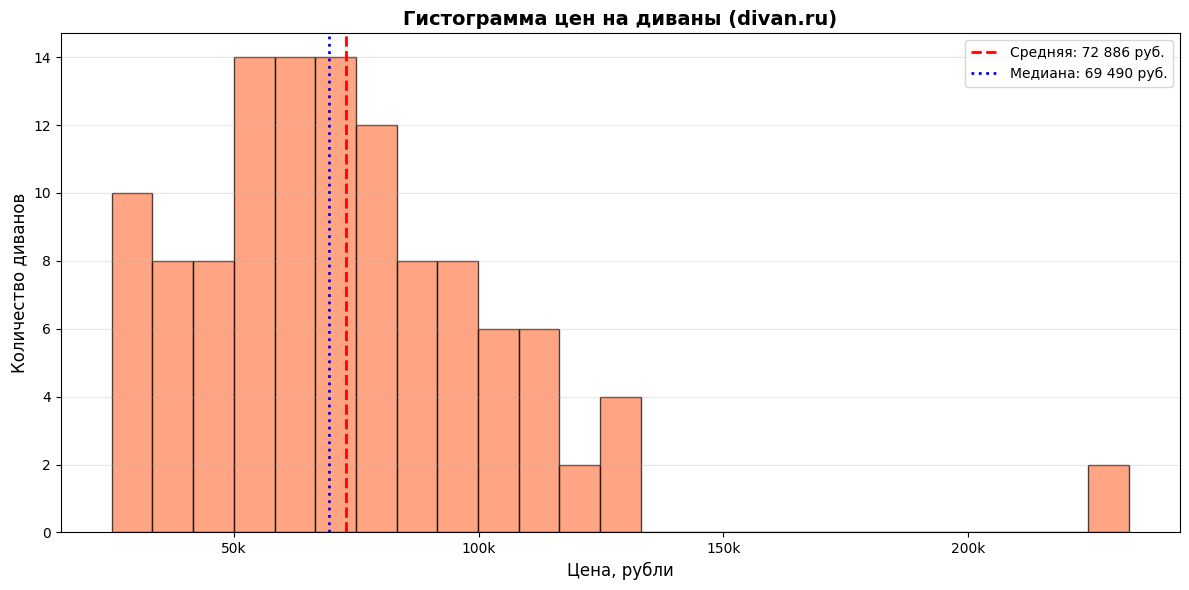


✅ Гистограмма построена!
   Всего диванов в выборке: 116


In [9]:
# Шаг 4: Гистограмма цен на диваны

plt.figure(figsize=(12, 6))

# Строим гистограмму
n, bins, patches = plt.hist(
    prices, 
    bins=25, 
    edgecolor='black', 
    alpha=0.7, 
    color='coral'
)

# Оформление графика
plt.title('Гистограмма цен на диваны (divan.ru)', fontsize=14, fontweight='bold')
plt.xlabel('Цена, рубли', fontsize=12)
plt.ylabel('Количество диванов', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Добавляем вертикальные линии для средней и медианы
plt.axvline(x=mean_price, color='red', linestyle='--', linewidth=2, 
            label=f'Средняя: {format_price(mean_price)} руб.')
plt.axvline(x=median_price, color='blue', linestyle=':', linewidth=2, 
            label=f'Медиана: {format_price(median_price)} руб.')

plt.legend(fontsize=10)

# Форматируем ось X для читаемости больших чисел
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k'))

plt.tight_layout()
plt.show()

print(f"\n✅ Гистограмма построена!")
print(f"   Всего диванов в выборке: {len(prices)}")

---

## Итоги

В этом ноутбуке выполнены все три задания:

1. ✅ **Гистограмма нормального распределения** — 1000 значений из N(0, 1)
2. ✅ **Диаграмма рассеяния** — 100 точек из равномерного распределения
3. ✅ **Анализ цен на диваны**:
   - Данные загружены из CSV (парсинг выполнен отдельным скриптом)
   - Цены очищены и отфильтрованы
   - Вычислена средняя цена
   - Построена гистограмма распределения цен
